# K-Means in Recommender Systems

## Clustering 
Clustering is a type of unsupervised learning where the goal is to group similar data points together. Although there are various clustering algorithms in Machine Learning, we will use K-Means. **K-Means can be used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean**.

## K-Means
In order to explain how K-Means works, we provide a step-by-step demonstration of the algorithm:

### 1. Initialization
After choosing the number of clusters we want to create, we randomly initialize the centroids of these clusters. A centroid is the mean position of all points that belong to a cluster

### 2. Assignment
For each data point, we calculate the distance to each centroid, and assign it to the cluster whose centroid is closest.

### 3. Update Centroids
Recalculate the centroids of the clusters based on the data points that were assigned to them. The new centroid is the mean of all the datapoints in the cluster.
### 4. Repeat
We repeat the last two steps until the centroid values converge.

Before applying KMeans on a dataset, we may find the optimal number of clusters to create (K). We can do that by using a method like **Elbow**. Elbow shows the optimal K by running the K-Means algorithm for a range of K values and calculating the sum of squared distances (WCSS) between data points and their assigned cluster centroids. **After running K-Means with the predefined K we selected, the final output is a set of K clusters, each represented by its centroid**.

## Quality of Clusters: Inertia

Inertia measures the total squared distance from points to their cluster's centroid. We obviously want this distance to be relatively small. If we increase the number of clusters, it will naturally make the average distance smaller. If every point has its own cluster, then our distance would be 0. That's obviously not an ideal way to cluster. One way to determine a reasonable number of clusters to simply try many different clusterings as we vary **k**, and each time, measure the overall inertia.

## Clustering in Recommender Systems
K-means clustering can be used in recommender systems to group similar items or users together based on their features or preferences.While K-means itself is not a traditional recommender system algorithm, it can be incorporated into the overall recommendation process.

### Item Clustering
One way to incorporate K-Means in reccomender systems in Item Clustering, where we apply the algorithm on the items (i.e. courses) of the dataset based on their features. Then, each cluster will represent a group of similar items. Thus, when a user interacts (i.e. highly rates) with an item, we can assign the user to the item-cluster in which that item belongs, and recommend other items of that cluster.

### User Clustering
Correspondingly, in User Clustering we apply the algorithm to the users of the dataset, based on their preferences, and produce a number of clusters that each represent a group of similar users. Afterwards, we could recommend items to a user based on the preferences of other users that belong in the same cluster.

It's important to note that K-Means is just one component of a recommender system. Combining it with other techniques, such as collaborative filtering, content-based filtering, or hybrid methods, can lead to more accurate and personalized recommendations.

## Item Clustering Example

### Prepare the Data

In [2]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz

df_courses = pd.read_csv("Coursera.csv")

features = ['Course Name', 'Skills']

df_courses['combined_features'] = df_courses[features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df_courses['combined_features'])
# Save the sparse matrix using save_npz
save_npz('tfidf_matrix_kmeans.npz', tfidf_matrix)

### Calculation of K using Elbow (It takes some time for large numbers)

50
100
200


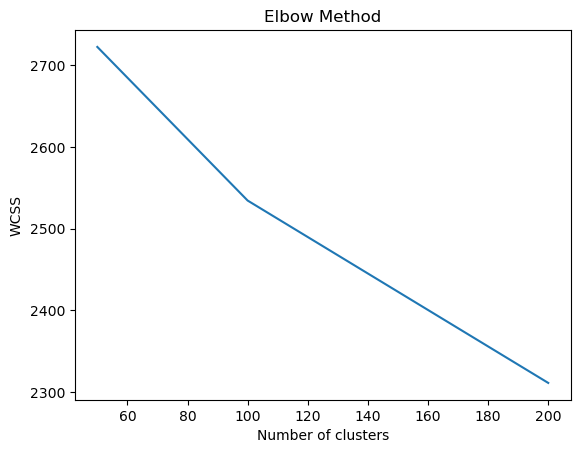

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in [50, 100, 200]:
    print(k)
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.plot([50, 100, 200], wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

### Calculation of K using Elbow (With more k now, [1, 10, 20, 50, 100, 150, 180, 200, 250, 300, 350, 400, 500])

C:\Users\lefte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


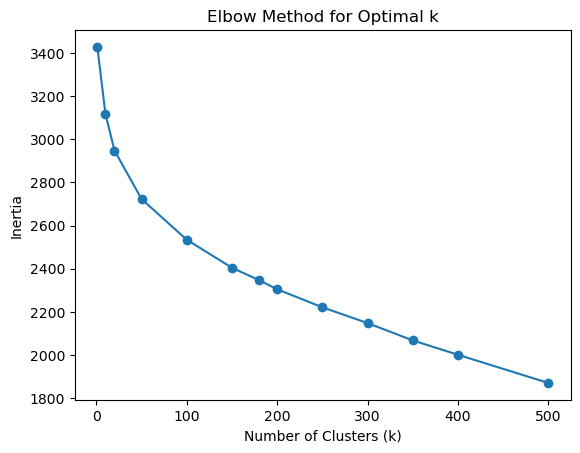

In [4]:
# Determine a logical range of k values
k_values = [1, 10, 20, 50, 100, 150, 180, 200, 250, 300, 350, 400, 500]  # You can adjust the range based on your data

# Run KMeans for each k and store the inertia in a list
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values,  wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## Applying K-Means with K=180

In [5]:
import numpy as np
from sklearn.cluster import KMeans

K = 180
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42).fit(tfidf_matrix)

## Recommend Similar Items

In [6]:
selectedItem = 12

In [7]:
query_course_index = selectedItem

query_course_tfidf = tfidf_matrix[query_course_index]

cluster = kmeans.predict(query_course_tfidf)

cluster = cluster[0]

courses_of_cluster = []

for i in range(df_courses.shape[0]):
    if kmeans.labels_[i] == cluster:
        courses_of_cluster.append(i)

        
courseNames = df_courses["Course Name"]
print(f"Similar items to '{courseNames[query_course_index]}':")
print()
for course in courses_of_cluster:
    if courseNames[query_course_index] != courseNames[course]:
        print(courseNames[course])

Similar items to 'Hacking and Patching':

Networking and Security in iOS Applications
Internet History, Technology, and Security
TCP/IP and Advanced Topics
Web Application Security Testing with OWASP ZAP
Network Security & Database Vulnerabilities
Network Security & Database Vulnerabilities
Introduction to G Suite
Getting Started with Linux Terminal
Software Security
Industrial IoT Markets and Security
Introduction to TCP/IP
Introduction to Architecting Smart IoT Devices
Web Application Security Testing with Burp Suite
Managing G Suite
Identifying Security Vulnerabilities
Introduction to Enterprise Resiliency
Planning for your G Suite Deployment
Web Connectivity and Security in Embedded Systems
Cybersecurity Capstone Project
Exploiting and Securing Vulnerabilities in Java Applications
